In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

# Loading & preparing the data
 MNIST stands for Modified National Institute of Standards and Technology dataset. It is a dataset of 70,000 handwritten images
 Each image is of 28*28 pixels i.e about 784 feature. Each Feature represent only one pixel intensity i.e. from 0(white) to 255
(black). This dataset is further devided into 60000 training and 10000 testing images.

In [22]:
#import dataset and split into train and test
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [23]:
#to see length pf training dataset
len(x_train)

60000

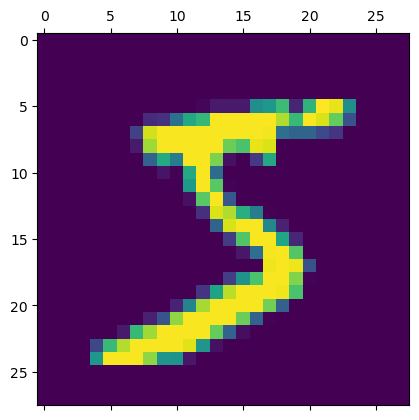

In [24]:
#to see how first image looks
plt.matshow(x_train[0])
plt.show()

In [25]:
#normalizing the images by scaling the pixel intensities to the range 0 to 1
x_train = x_train/255
x_test = x_test/255

In [26]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Creating Model
The Relu function is one of the most popular activation function. It stands for "Rectified Linear Unit".
Mathematically this function is defined as y=max(0,x).The relu function returns 0 if the input is -ve and 
linear if the input is positive

The softmax function is another activation function. It changes input values into values that reach from 0 to 1

In [27]:
#Creating th model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  # Input Layer
    keras.layers.Dense(128,activation='relu'),  # Dense Layer
    keras.layers.Dense(10,activation='softmax') # Output Layer
])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [29]:
#Complie the model
model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [30]:
#Train model
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6458 - accuracy: 0.8387 - val_loss: 0.3574 - val_accuracy: 0.9023
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3351 - accuracy: 0.9079 - val_loss: 0.2936 - val_accuracy: 0.9173
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2873 - accuracy: 0.9194 - val_loss: 0.2609 - val_accuracy: 0.9284
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2577 - accuracy: 0.9276 - val_loss: 0.2365 - val_accuracy: 0.9344
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2350 - accuracy: 0.9340 - val_loss: 0.2189 - val_accuracy: 0.9383
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2163 - accuracy: 0.9392 - val_loss: 0.2058 - val_accuracy: 0.9409
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2005 - accuracy: 0.9439 - val_loss: 0.1920 - val_accuracy:

In [31]:
#Evaluate the model
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1615 - accuracy: 0.9544
Loss=0.162
Accuracy=0.954


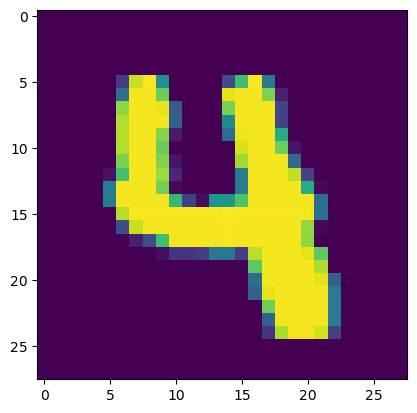

In [32]:
#Making prediction on new data
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [42]:
# we use predict() on new data
predicted_value = model.predict(x_test)
print("Handwritten number in the image is = ",np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 2ms/step
<class 'numpy.ndarray'>
7


In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

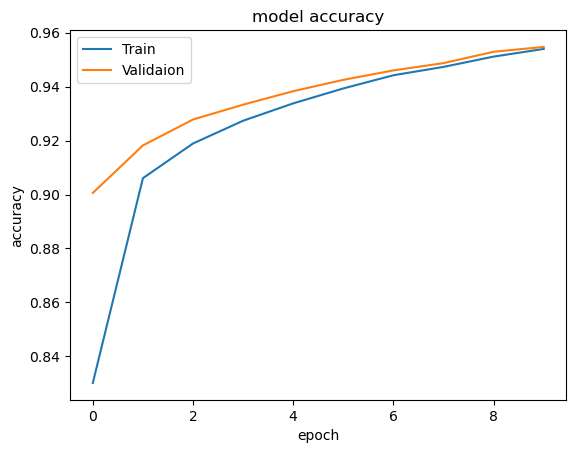

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validaion'], loc='upper left')
plt.show()

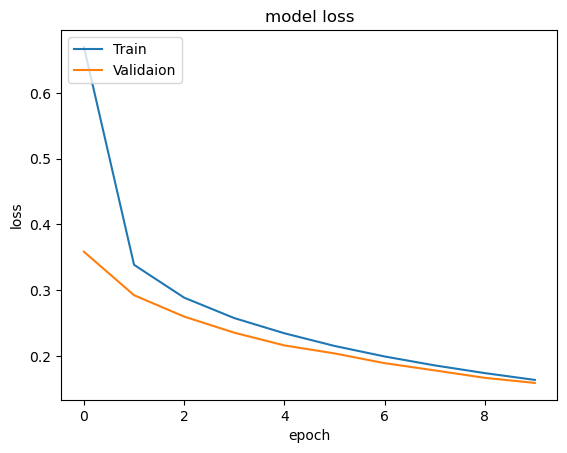

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validaion'], loc='upper left')
plt.show()

In [44]:
#Confusion Matrix
test_predict = model.predict(x_test)
# Get the classification labels
test_predict_labels = np.argmax(test_predict,axis=1)
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=test_predict_labels)
print('Confusion matrix of the test set:\n',confusion_matrix)

313/313 [==============================] - 1s 2ms/step
Confusion matrix of the test set:
 tf.Tensor(
[[ 964    0    1    2    1    3    7    1    1    0]
 [   0 1116    2    2    0    1    5    2    7    0]
 [   7    1  985    7    3    2   10    8    8    1]
 [   0    1   13  959    0   10    1   10   12    4]
 [   1    0    4    0  943    0    9    3    5   17]
 [   9    2    1   15    0  839   10    1   10    5]
 [   9    3    5    0    9   11  918    1    2    0]
 [   1    8   21    4    3    3    0  965    3   20]
 [   4    2    4   13    6   10    9    8  915    3]
 [   8    9    1   10   22    6    1    8    4  940]], shape=(10, 10), dtype=int32)


<class 'numpy.int64'>
